<a href="https://colab.research.google.com/github/shanaka-desoysa/notes/blob/main/docs/TensorFlow/Using_TensorFlow_DataSets.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using TensorFlow  Datasets

**TensorFlow Datasets**   
Tensorflow/datasets is a library of datasets ready to use with TensorFlow.
Module: tensorflow_datasets  
Each dataset is defined as a tfds.core.DatasetBuilder which encapsulates the logic to download the dataset and construct an input pipeline, as well as contains the dataset documentation (version, splits, number of examples, etc.).  
It handles downloading and preparing the data using: tf.data.Dataset.    
https://www.tensorflow.org/datasets/overview

### Install the datasets  
Note: You must have TensorFlow already installed.  
Currently depends on tensorflow verion (or tensorflow-gpu) >= 1.15.0.

In [2]:
!pip install tensorflow-datasets -qq

### Set up Imports

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

### Important: Citation required for TF Datasets  
TensorFlow documentation notes the following when you use TF Datasets:  
Include the following citation when using tensorflow-datasets for a paper in addition to any other citation specific to the dataset.

@misc{TFDS,
  title = { {TensorFlow Datasets}, A collection of ready-to-use datasets},  
  howpublished = {\url{https://www.tensorflow.org/datasets}},  
}  
**CIFAR-10 Citation:**  
@TECHREPORT{Krizhevsky09learningmultiple,  
    author = {Alex Krizhevsky},  
    title = {Learning multiple layers of features from tiny images},  
    institution = {},  
    year = {2009}  
}  

### List the available datasets

Each dataset is implemented as a tfds.core.DatasetBuilder and you can list all available builders with tfds.list_builders().

In [7]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

### tfds.load: Load a dataset in one line
tfds.load Method is the simplest way to build and load a tf.data.Dataset:
https://www.tensorflow.org/datasets/api_docs/python/tfds/load

tf.data.Dataset is the standard TensorFlow API to build input pipelines. https://www.tensorflow.org/api_docs/python/tf/data/Dataset  

**Load the MNIST training data**    
It downloads and prepares the data, unless you specify download=False. Note that once data has been prepared, subsequent calls of load will reuse the prepared data. You can customize where the data is saved/loaded by specifying data_dir= ( defaults to ~/tensorflow_datasets/).  
When loading a TF dataset the canonical default version is used. It is recommended to specify the major version of the dataset to use and to advertise which version of the dataset was used in your results. See the documentation on datasets versioning for more details.

https://www.tensorflow.org/datasets/catalog/overview

**Examples:**  
mnist = tfds.load("mnist:1.*.*")  
tfds.load('imagenet2012:2.0.1')  
tfds.builder('imagenet2012:2.0.1')  
tfds.load('imagenet2012:2.0.0')  # Error: unsupported version.  
  
**Resolves to 3.0.0 for now, but would resolve to 3.1.1 if when added.**  
tfds.load('imagenet2012:3.*.*')  

https://www.tensorflow.org/datasets/catalog/overview#all_datasets   
**Data Set Categories:**    
Audio  
Images  
Object Detection  
Structured  
Summarization  
Text  
Translate  
Videos  

In [8]:
#See following two examples:
#mnist_train = tfds.load(name="mnist:1.*.*", split="train") if you use this you will get a notice that you are not using the latest
#mnist_train = tfds.load("mnist:3.*.*",split="train")  # Latest dataset is obtained but you need latest major version
mnist_train = tfds.load("mnist",split="train")  # Latest dataset is obtained
assert isinstance(mnist_train, tf.data.Dataset)
print(mnist_train)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


### Feature Dictionaries  
All TensorFlow datasets contain feature dictionaries which map feature names to Tensor values.  
Example:  
A typical dataset will have 2 keys: "image" and "label".

Label: 6


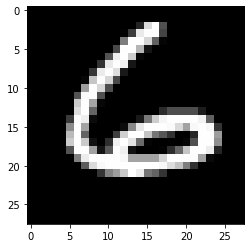

In [10]:
#Obtain a single example from the Feature Dictionary
for mnist_example in mnist_train.take(100):   # Let's look at the 100th image in the Feature Dictionary 
    image, label = mnist_example["image"], mnist_example["label"]

    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
print(f"Label: {label.numpy()}")

In [11]:
cifar10_train = tfds.load("cifar10",split="train") 

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteWT30FE/cifar10-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteWT30FE/cifar10-test.tfrecord
Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


**CFAR-10 Features Dictionary defines keys: image and label.**  
FeaturesDict({  
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),  
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),  
})  

Label: 7


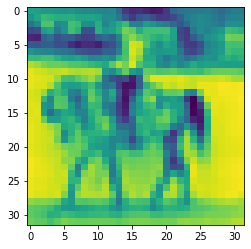

In [12]:
#Obtain a single example from the Feature Dictionary
for cifar10_example in cifar10_train.take(1):   # Let's look at the 1st image in the Feature Dictionary 
    image, label = cifar10_example["image"], cifar10_example["label"]

    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap())   #default is color
print(f"Label: {label.numpy()}")

### DatasetBuilder
tfds.load is  a thin conveninence wrapper around DatasetBuilder. We can accomplish the same as above directly with the MNIST DatasetBuilder.  

In [14]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()
mnist_train = mnist_builder.as_dataset(split="train")
mnist_train

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

### Dataset Info  
The builder (mnist_builder) contains useful information about the dataset.

In [15]:
info = mnist_builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



### Another alternative to print Features Info
You can obtain info on the Data set in the load module.

In [16]:
mnist_test, info = tfds.load("mnist", split="test", with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



### DataSet (Features Info)
You can also obtain info about the Features of a Data set.  

In [17]:
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})
10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


### Input pipelines
Once you have a tf.data.Dataset object, you can define the rest of an input pipeline suitable for model training by using the tf.data API.

The following repeats the dataset so that we have an infinite stream of examples, shuffle, and create batches of 32.

In [18]:
mnist_train = mnist_train.repeat().shuffle(1024).batch(32)

# prefetch will enable the input pipeline to asynchronously fetch batches while
# your model is training.
mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)

# You could loop over batches of the dataset and train
# for batches in mnist_train


### Visualization
For image classification data sets, use tdfs.show_examples to display some example images.  
Note: Requires matplotlib to be installed  
https://www.tensorflow.org/datasets/api_docs/python/tfds/show_examples

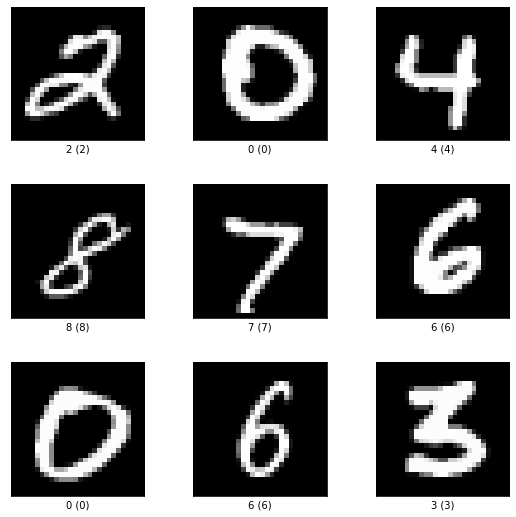

In [20]:
fig = tfds.show_examples(mnist_test, info)

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


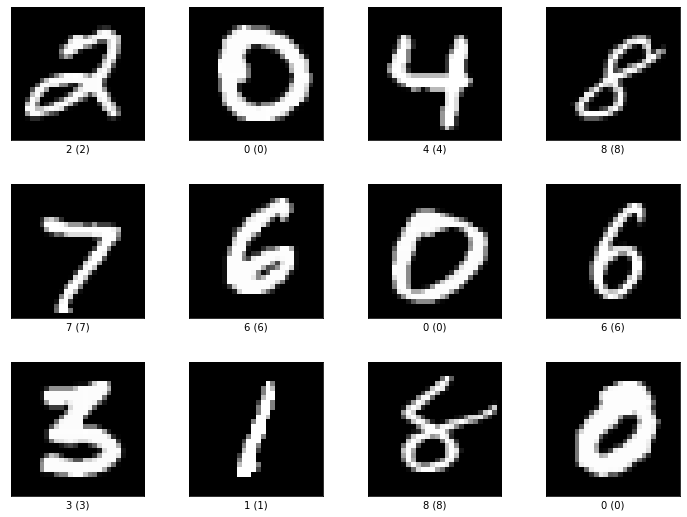

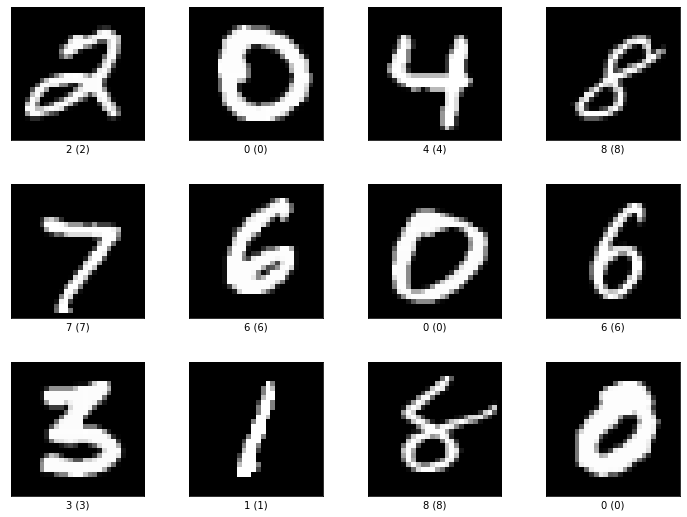

In [21]:
tfds.show_examples(info, mnist_test, rows=3, cols=4, plot_scale=3.0, image_key=None)

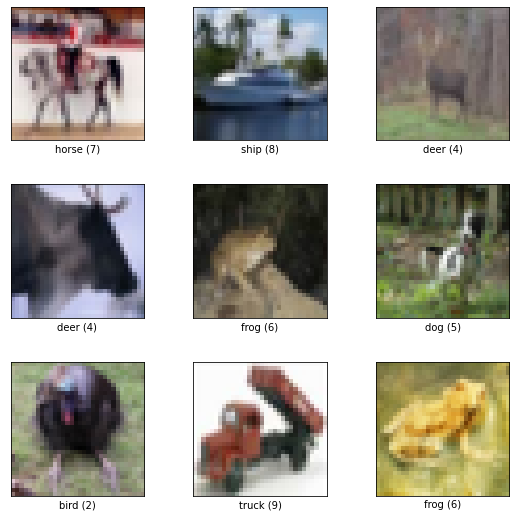

In [23]:
# Another example from cifar10
ds, ds_info = tfds.load('cifar10', split='train', with_info=True)
fig = tfds.show_examples(ds, ds_info)